In [1]:
#import statements
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

In [2]:
housing = pd.read_csv('../data/train.csv')

In [3]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size = 0.2, random_state=21)
for train_ix, test_ix in split.split(housing, housing['MSZoning']):
    df_train = housing.loc[train_ix]
    df_test = housing.loc[test_ix]

In [4]:
#House Features

#Continuous features
H_contin_cols = ['YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2',
                 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
                'GrLivArea']

#Ordinal features
H_ordin_cols = ['OverallQual', 'OverallCond', 'ExterQual', 'ExterCond',
                'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath',
               'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
               'TotRmsAbvGrd', 'Functional']

#Categorical features
H_cat_cols = ['MSSubClass', 'BldgType', 'HouseStyle' ]

In [5]:
#Lot Features

#Continuous features
L_contin_cols = ['LotFrontage', 'LotArea']

#Ordinal features
L_ordin_cols = ['LotShape', 'LandSlope']

#Categorical features
L_cat_cols = ['MSZoning', 'Street', 'Alley', 'Utilities','LandContour',
              'LotConfig',  'Neighborhood', 'Condition1', 'Condition2' ]

In [6]:
#Garage Features

#Continuous features
G_contin_cols = ['GarageYrBlt', 'GarageArea']

#Ordinal features
G_ordin_cols = ['GarageCars', 'GarageQual', 'GarageCond','GarageFinish']

#Categorical features
G_cat_cols = ['GarageType']

In [7]:
#Misc Features

#Continuous features
M_contin_cols = ['MasVnrArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
                'ScreenPorch', 'PoolArea', 'MiscVal']

#Ordinal features
M_ordin_cols = ['HeatingQC', 'FireplaceQu', 'PoolQC', 'BsmtExposure','Fireplaces']

#Categorical features
M_cat_cols = ['RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
              'MasVnrType', 'Foundation', 'Heating', 'CentralAir',
             'Electrical', 'PavedDrive', 'MiscFeature', 'MoSold', 'YrSold',
             'SaleType', 'SaleCondition', 'Fence']

In [8]:
df_train[H_ordin_cols].describe()

,OverallQual,OverallCond,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,6.116438,5.588185,0.424658,0.065068,1.565068,0.385274,2.884418,1.050514,6.556507
std,1.373068,1.111950,0.519846,0.253603,0.556226,0.504162,0.821412,0.230531,1.645609
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
25%,5.000000,5.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000
50%,6.000000,5.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000
75%,7.000000,6.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000
max,10.000000,9.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000


In [9]:
def corr_matrix(df, cols): #correlation matrix
    corr = df[cols].corr()
    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True


    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    f, ax = plt.subplots(figsize=(12, 9))
    sns.heatmap(corr, vmax=.8, square=True, cmap=cmap, mask=mask, annot=True, fmt='.2f', annot_kws={'size': 10});

### House Ordinal

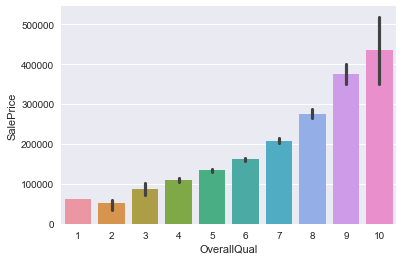

In [10]:
sns.barplot(df_train['OverallQual'], df_train.SalePrice)

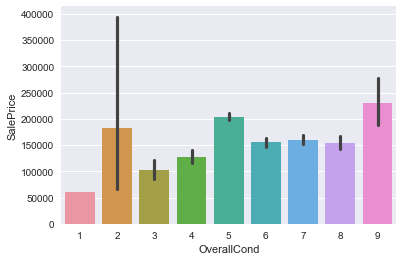

In [11]:
sns.barplot(df_train['OverallCond'], df_train.SalePrice)

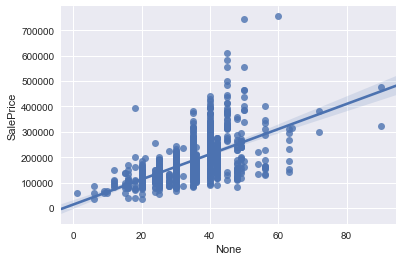

In [12]:
qualscore = df_train['OverallCond']*df_train['OverallQual']

sns.regplot(qualscore, df_train.SalePrice)

In [13]:
corr_test = df_train[['OverallCond','OverallQual','SalePrice']].copy()
corr_test['QualScore'] = corr_test['OverallCond']*corr_test['OverallQual']

corr = corr_test.corr()
corr['SalePrice'].sort_values(ascending=False)

SalePrice      1.000000
OverallQual    0.788738
QualScore      0.563476
OverallCond   -0.081673
Name: SalePrice, dtype: float64

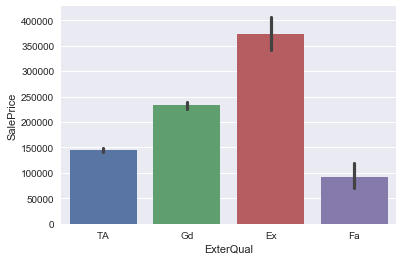

In [14]:
sns.barplot(df_train['ExterQual'], df_train.SalePrice)

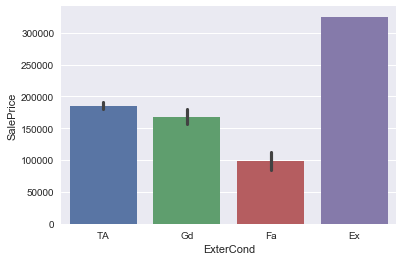

In [15]:
sns.barplot(df_train['ExterCond'], df_train.SalePrice)

In [16]:
def condToNum(df, col):
    df = df.fillna({col: "NA"})
    condition_nums = {col:  {"NA":0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5}}
    
    df.replace(condition_nums, inplace=True)
    return df

In [17]:
df_train = condToNum(df_train,'ExterCond')

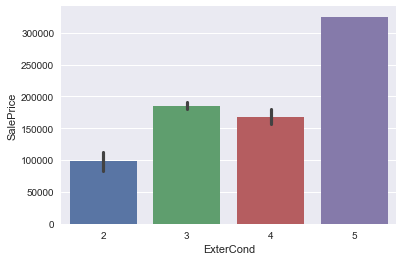

In [18]:
sns.barplot(df_train['ExterCond'], df_train.SalePrice)

In [19]:
df_train = condToNum(df_train,'ExterQual')

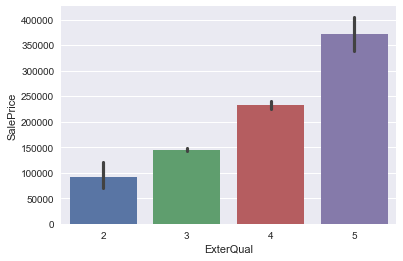

In [20]:
sns.barplot(df_train['ExterQual'], df_train.SalePrice)

In [21]:
corr_test2 = df_train[['ExterCond','ExterQual','SalePrice']].copy()
corr_test2['QualScore'] = corr_test2['ExterCond']*corr_test2['ExterQual']

corr = corr_test2.corr()
corr['SalePrice'].sort_values(ascending=False)

SalePrice    1.000000
ExterQual    0.688401
QualScore    0.581478
ExterCond    0.011463
Name: SalePrice, dtype: float64

In [22]:
df_train = condToNum(df_train,'BsmtQual')
df_train = condToNum(df_train,'BsmtCond')

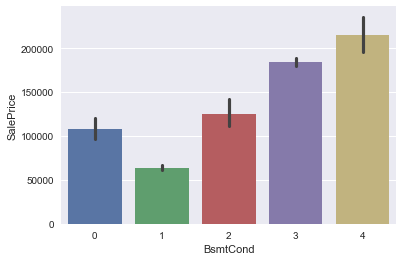

In [23]:
sns.barplot(df_train['BsmtCond'], df_train.SalePrice)

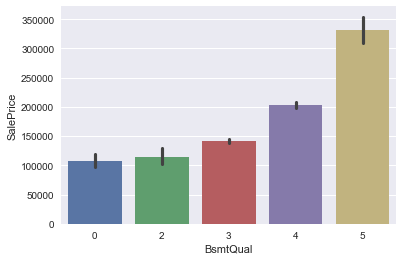

In [24]:
sns.barplot(df_train['BsmtQual'], df_train.SalePrice)

In [25]:
corr_test3 = df_train[['BsmtCond','BsmtQual','SalePrice']].copy()
corr_test3['QualScore'] = corr_test3['BsmtCond']*corr_test3['BsmtQual']

corr = corr_test3.corr()
corr['SalePrice'].sort_values(ascending=False)

SalePrice    1.000000
BsmtQual     0.592280
QualScore    0.574397
BsmtCond     0.200947
Name: SalePrice, dtype: float64

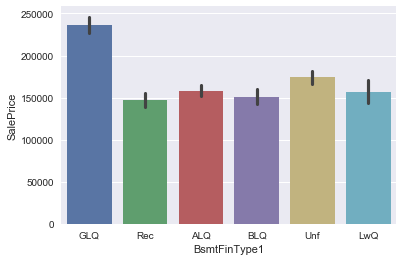

In [26]:
sns.barplot(df_train['BsmtFinType1'], df_train.SalePrice)

In [27]:
def finToNum(df, col):
    df = df.fillna({col: "NA"})
    fin_nums = {col:  {"NA":0, "Unf": 1, "LwQ": 2, "Rec": 3, "BLQ": 4, "ALQ": 5, "GLQ": 6}}
    
    df.replace(fin_nums, inplace=True)
    return df

In [28]:
df_train = finToNum(df_train, 'BsmtFinType1')

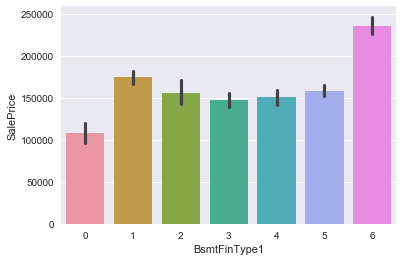

In [29]:
sns.barplot(df_train['BsmtFinType1'], df_train.SalePrice)

In [30]:
df_train = finToNum(df_train, 'BsmtFinType2')

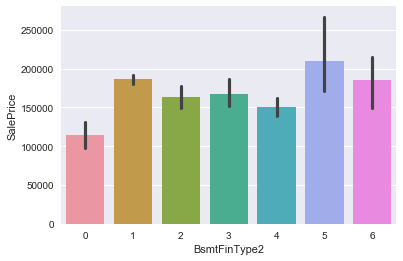

In [31]:
sns.barplot(df_train['BsmtFinType2'], df_train.SalePrice)

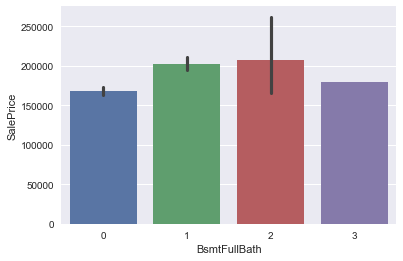

In [32]:
sns.barplot(df_train['BsmtFullBath'], df_train.SalePrice)

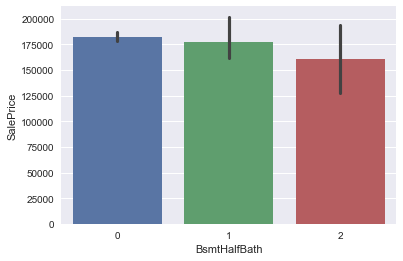

In [33]:
sns.barplot(df_train['BsmtHalfBath'], df_train.SalePrice)

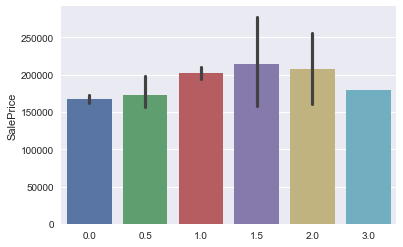

In [34]:
sns.barplot(df_train['BsmtFullBath']+0.5*df_train['BsmtHalfBath'], df_train.SalePrice)

In [76]:
def exposToNum(df, col):
    df = df.fillna({col: "None"})
    expos_nums = {col:  {"None":0, "No": 1, "Mn": 2, "Av": 3, "Gd": 4}}
    
    df.replace(expos_nums, inplace=True)
    return df

In [77]:
df_train = exposToNum(df_train, 'BsmtExposure')

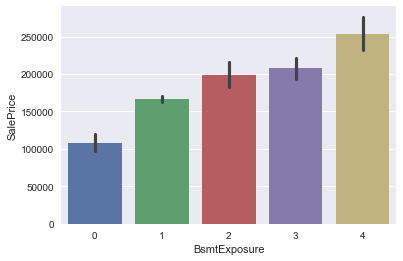

In [78]:
sns.barplot(df_train['BsmtExposure'], df_train.SalePrice)

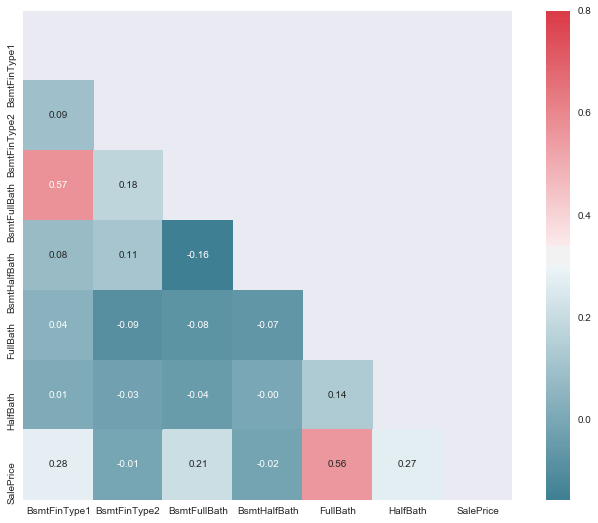

In [35]:
corr_matrix(df_train, ['BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath',
               'BsmtHalfBath', 'FullBath', 'HalfBath', 'SalePrice'])

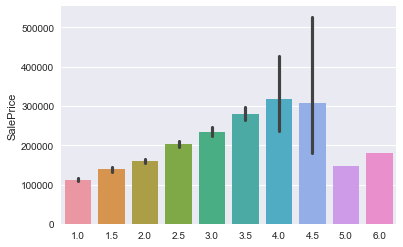

In [36]:
bathrooms = df_train['BsmtFullBath']+0.5*df_train['BsmtHalfBath']+df_train['FullBath']+0.5*df_train['HalfBath']
sns.barplot(bathrooms, df_train.SalePrice)

In [37]:
bathrooms = np.where(bathrooms > 3.5, 4, bathrooms)

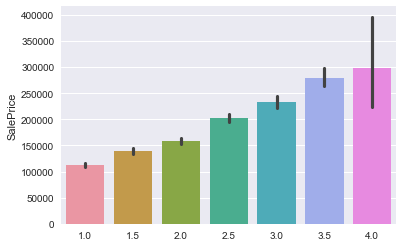

In [38]:
sns.barplot(bathrooms, df_train.SalePrice)

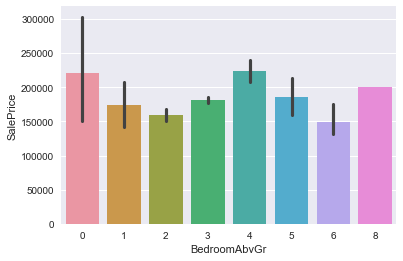

In [39]:
sns.barplot(df_train['BedroomAbvGr'], df_train.SalePrice)

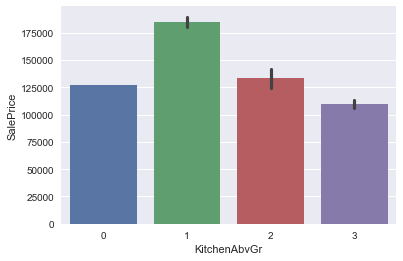

In [40]:
sns.barplot(df_train['KitchenAbvGr'], df_train.SalePrice)

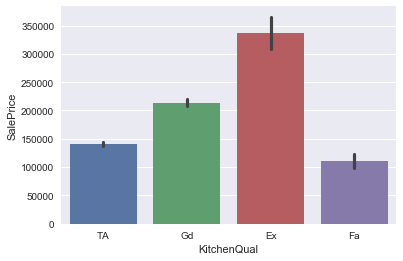

In [41]:
sns.barplot(df_train['KitchenQual'], df_train.SalePrice)

In [42]:
df_train = condToNum(df_train,'KitchenQual')

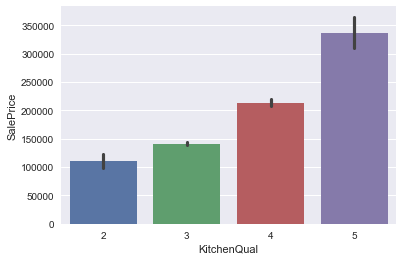

In [43]:
sns.barplot(df_train['KitchenQual'], df_train.SalePrice)

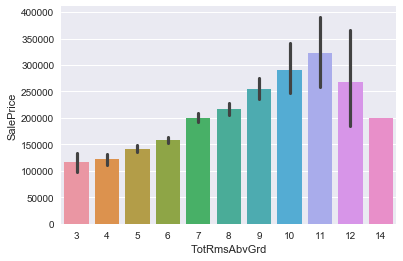

In [44]:
sns.barplot(df_train['TotRmsAbvGrd'], df_train.SalePrice)

In [45]:
tot_rooms = np.where(df_train['TotRmsAbvGrd'] > 10, 10, df_train['TotRmsAbvGrd'])

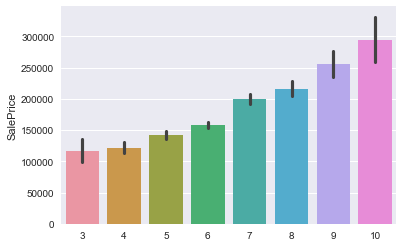

In [46]:
sns.barplot(tot_rooms, df_train.SalePrice)

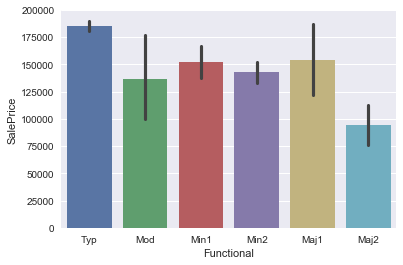

In [47]:
sns.barplot(df_train['Functional'], df_train.SalePrice)

In [48]:
def funcToNum(df, col):
    df = df.fillna({col: "NA"})
    func_nums = {col:  {"Sal":0, "Sev": 1, "Maj2": 2, "Maj1": 3, "Mod": 4, "Min2": 5, "Min1": 6, "Typ": 7, "NA":7}}
    
    df.replace(func_nums, inplace=True)
    return df

In [49]:
df_train = funcToNum(df_train, 'Functional')

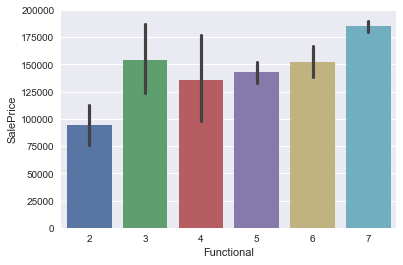

In [50]:
sns.barplot(df_train['Functional'], df_train.SalePrice)

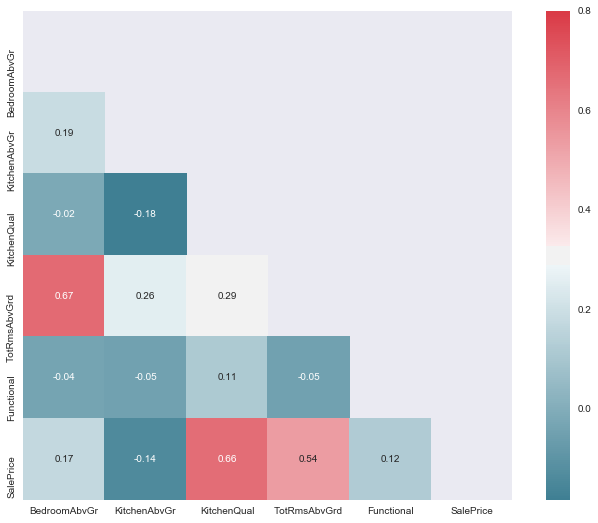

In [51]:
corr_matrix(df_train, ['BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
               'TotRmsAbvGrd', 'Functional', 'SalePrice'])

Things to do:

- Use Overall Qual
- Drop OveralCond
- Convert 'ExterQual','BsmtQual', 'BsmtCond', 'BsmtFinType1', 'KitchenQual, 'Functional' to numeric
- Drop 'ExterCond'
- Convert 'BsmtFinType2' to cat (0, 1)
- Combine 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath' to Bathrooms
- Collapse bathrooms >4 to 4
- Drop BedroomAbvGr
- Collapse TotRmsAbvGrd > 10 to 10
- Normalize remaining columns

### Lot Ordinal

In [52]:
df_train[L_ordin_cols].describe()

,LotShape,LandSlope
count,1168,1168
unique,4,3
top,Reg,Gtl
freq,733,1110


In [53]:
def shapeToNum(df, col):
    df = df.fillna({col: "NA"})
    shape_nums = {col:  {"IR3":0, "IR2": 1, "IR1": 2, "Reg": 3, "NA": 3}}
    
    df.replace(shape_nums, inplace=True)
    return df

def slopeToNum(df, col):
    df = df.fillna({col: "NA"})
    slope_nums = {col:  {"Gtl":0, "Mod": 1, "Sev": 2, "NA": 0}}
    
    df.replace(slope_nums, inplace=True)
    return df

In [54]:
df_train = shapeToNum(df_train,'LotShape')


In [55]:
df_train = slopeToNum(df_train,'LandSlope')

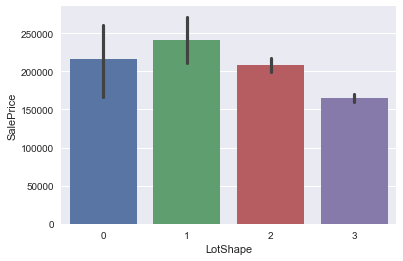

In [56]:
sns.barplot(df_train['LotShape'], df_train.SalePrice)

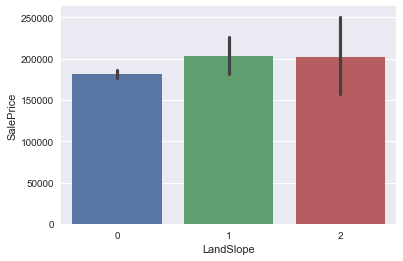

In [57]:
sns.barplot(df_train['LandSlope'], df_train.SalePrice)

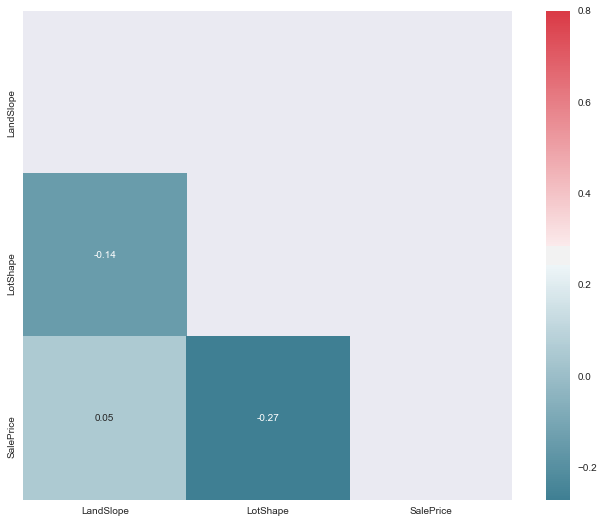

In [58]:
corr_matrix(df_train, ['LandSlope','LotShape', 'SalePrice'])

Things to do:

- Convert 'LotShape' to numeric
- Drop 'LandSlope'

### Garage and Misc Ordinal

In [59]:
qual_ordin_cols = ['HeatingQC', 'FireplaceQu', 'PoolQC', 'GarageQual', 'GarageCond']

for col in qual_ordin_cols:
    df_train = condToNum(df_train,col)

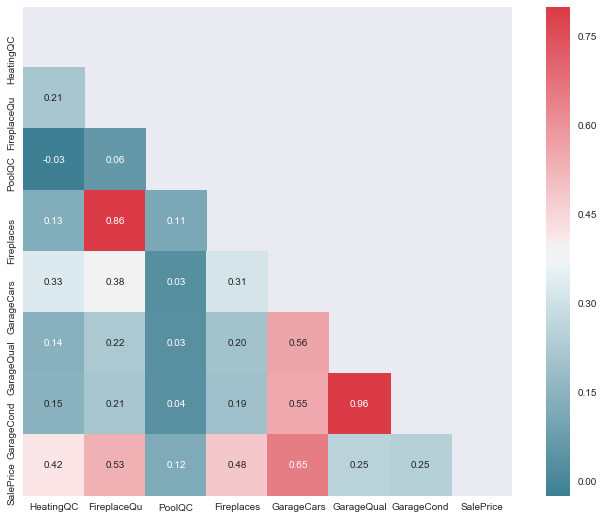

In [60]:
corr_matrix(df_train, M_ordin_cols+G_ordin_cols+['SalePrice'])

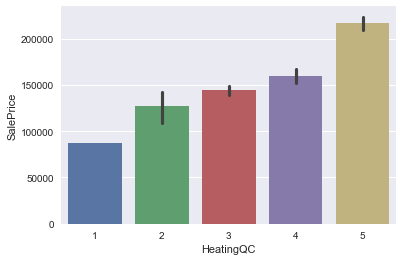

In [61]:
sns.barplot(df_train['HeatingQC'], df_train.SalePrice)

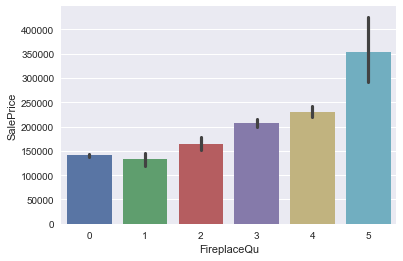

In [62]:
sns.barplot(df_train['FireplaceQu'], df_train.SalePrice)

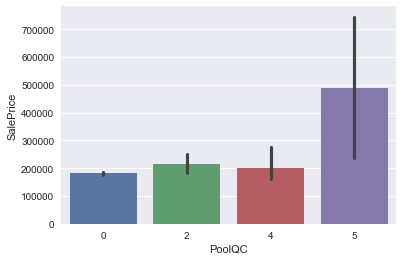

In [63]:
sns.barplot(df_train['PoolQC'], df_train.SalePrice)

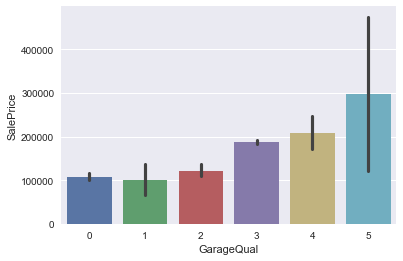

In [64]:
sns.barplot(df_train['GarageQual'], df_train.SalePrice)

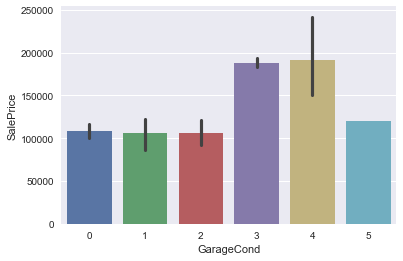

In [65]:
sns.barplot(df_train['GarageCond'], df_train.SalePrice)

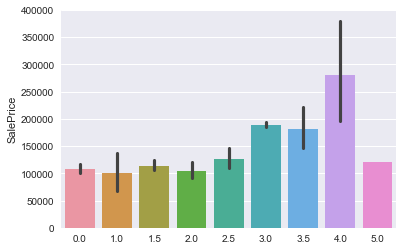

In [66]:
garage_score = (df_train['GarageCond']+df_train['GarageQual'])/2

sns.barplot(garage_score, df_train.SalePrice)

In [67]:
def garFinToNum(df, col):
    df = df.fillna({col: "NA"})
    slope_nums = {col:  {"NA":0, "Unf": 1, "RFn": 2, "Fin": 3}}
    
    df.replace(slope_nums, inplace=True)
    return df

In [68]:
df_train = garFinToNum(df_train,'GarageFinish')

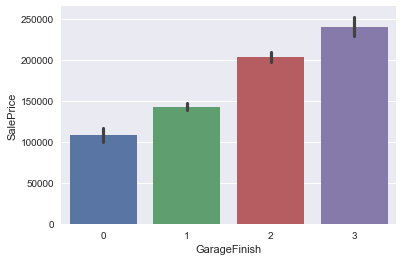

In [69]:
sns.barplot(df_train['GarageFinish'], df_train.SalePrice)

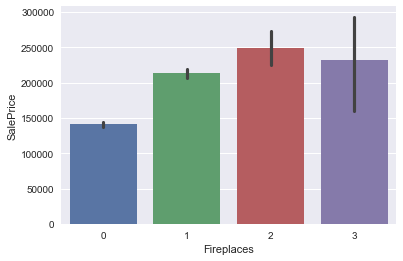

In [70]:
sns.barplot(df_train['Fireplaces'], df_train.SalePrice)

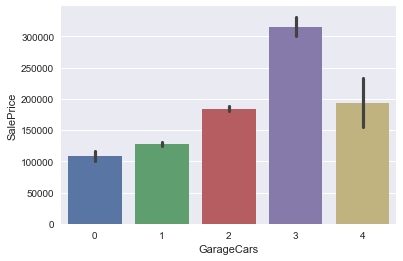

In [71]:
sns.barplot(df_train['GarageCars'], df_train.SalePrice)

Things to do:

- Convert 'HeatingQC', 'FireplaceQu', 'PoolQC', 'GarageQual', 'GarageCond', 'GarageFinish' to numeric
- Drop 'GarageCars'
- Drop 'GarageCond'
- Drop 'PoolQC'